In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Lecture 06

## Exercise 06.1

In this lecture we want to implement the 1D Ising Model, in particular simulating a system of $50$ spins that can interact only with their immediate neighbors. We choose to consider $J=1$ and use units such that $\mu_B=1$ and $k_B=1$. We want to simulate the system at temperatures in the range $[0.5, 2.0]$ and, since the model is solvable, confront measures of four quantities (internal energy, heat capacity, magnetization and susceptibility) with the exact results.

First, we complete the code that was given, adding the Metropolis and Gibbs sampling algorithms, the possibility of restarting from a previous spin configuration and the calculation of $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$.

Now that we are ready to go, we first test how many steps are necessary for the system to reach equilibrium.

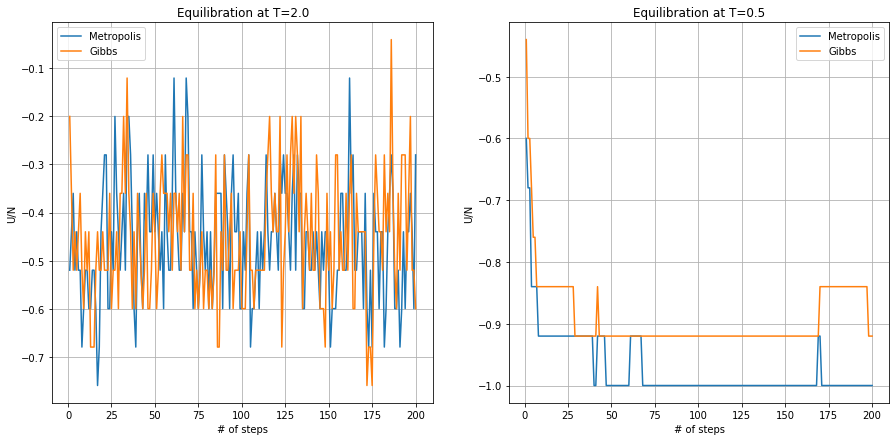

In [2]:
n_data = 200
x = np.linspace(1,n_data,num=n_data)
y = np.loadtxt( "data/EQ2.0Metro.0", usecols=(1), unpack='true', max_rows=n_data )
y2 = np.loadtxt( "data/EQ2.0Gibbs.0", usecols=(1), unpack='true', max_rows=n_data )
y3 = np.loadtxt( "data/EQ0.5Metro.0", usecols=(1), unpack='true', max_rows=n_data )
y4 = np.loadtxt( "data/EQ0.5Gibbs.0", usecols=(1), unpack='true', max_rows=n_data )

fig=plt.figure(figsize=(15,7))
plt.subplot(121)
plt.plot(x,y, label='Metropolis')
plt.plot(x, y2, label='Gibbs')
plt.title('Equilibration at T=2.0')
plt.xlabel('# of steps')
plt.ylabel('U/N')
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.plot(x,y3, label='Metropolis')
plt.plot(x, y4, label='Gibbs')
plt.title('Equilibration at T=0.5')
plt.xlabel('# of steps')
plt.ylabel('U/N')
plt.grid(True)
plt.legend()

plt.show()

It is clear that the equilibration of the system is almost instantaneous, requiring just a few extra steps for low temperatures (around $50$). During the actual simulation, the system will then be equilibrated with $150$ initial steps.

In the following graphs we show the result of the simulations, plotting from the temperature of $0.5$ up to $2.0$ ($21$ points total, one point every $0.075$). The value showed and its error are the ones on the last block of the simulation, which was divided in $50$ blocks of $10^4$ steps each.

In [3]:
Ns = 50
J=1.0


def u(T):
    th = np.tanh(J/T)
    thN= th**Ns
    ch = 1/th
    e = -J*( th + ch*thN )/( 1 + thN )
    return e

def c(T):
    beta = 1/T
    th = np.tanh(J/T)
    thN= th**Ns
    ch = 1/th
    heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
    return heat

def m(T,h):
    b = 1/T

    l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    Z = l1**Ns + l2**Ns
    M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
            + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
    return M
    
def chi(T):
    th = np.tanh(J/T)
    beta = 1/T
    thN = th**Ns
    chi = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
    return chi

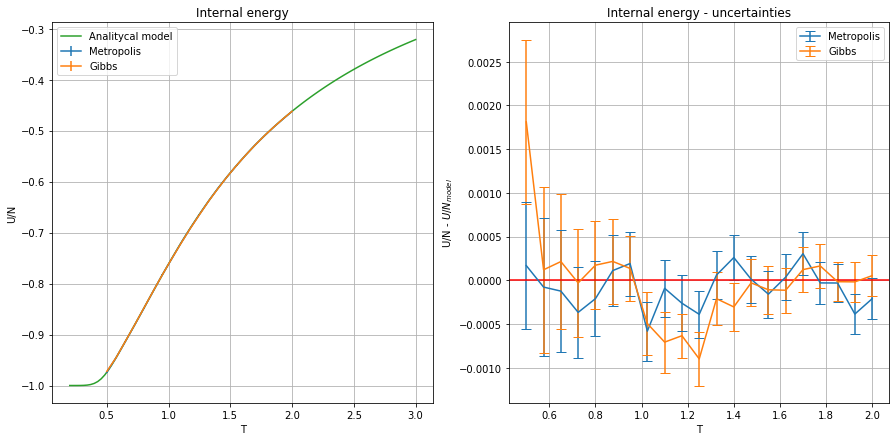

In [4]:
points=100
Tmodel = np.linspace(0.2,3.0,num=points)
umodel=u(Tmodel)

Tmetro, umetro, err_umetro=np.loadtxt( "data/eneMetro.dat", usecols=(0,1,2), delimiter=' ', unpack='true' )
Tgibbs, ugibbs, err_ugibbs=np.loadtxt( "data/eneGibbs.dat", usecols=(0,1,2), delimiter=' ', unpack='true' )

fig= plt.figure(figsize=(15,7))

plt.subplot(121)
plt.errorbar(Tmetro, umetro, yerr=err_umetro, label="Metropolis")
plt.errorbar(Tgibbs, ugibbs, yerr=err_ugibbs, label="Gibbs")
plt.plot(Tmodel, umodel, label="Analitycal model")
plt.title("Internal energy")
plt.xlabel("T")
plt.ylabel("U/N")
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.errorbar(Tmetro, umetro-u(Tmetro),yerr=err_umetro, label="Metropolis", capsize=5)
plt.errorbar(Tgibbs, ugibbs-u(Tgibbs),yerr=err_ugibbs, label="Gibbs", capsize=5)
plt.axhline(0, 0,1, color="red")
plt.title("Internal energy - uncertainties")
plt.xlabel("T")
plt.ylabel("U/N - $U/N_{model}$")
plt.grid(True)
plt.legend()
    
plt.show()

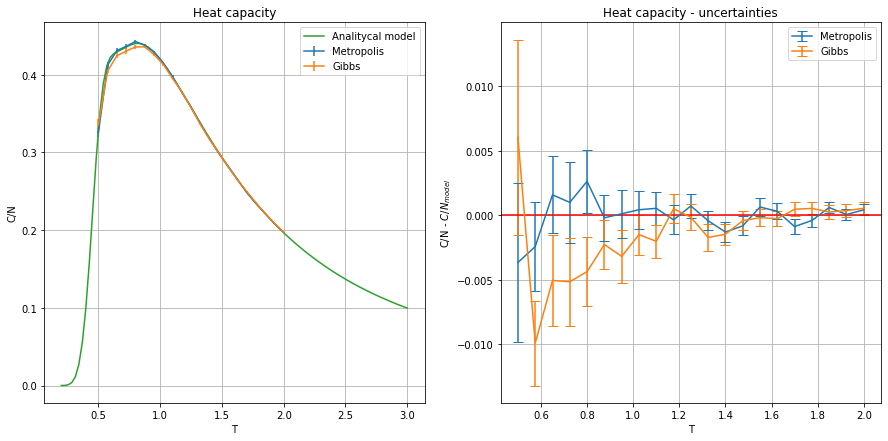

In [5]:
cmodel=c(Tmodel)

Tmetro, cmetro, err_cmetro=np.loadtxt( "data/heatMetro.dat", usecols=(0,1,2), delimiter=' ', unpack='true' )
Tgibbs, cgibbs, err_cgibbs=np.loadtxt( "data/heatGibbs.dat", usecols=(0,1,2), delimiter=' ', unpack='true' )

fig= plt.figure(figsize=(15,7))

plt.subplot(121)
plt.errorbar(Tmetro, cmetro, yerr=err_cmetro, label="Metropolis")
plt.errorbar(Tgibbs, cgibbs, yerr=err_cgibbs, label="Gibbs")
plt.plot(Tmodel, cmodel, label="Analitycal model")
plt.title("Heat capacity")
plt.xlabel("T")
plt.ylabel("C/N")
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.errorbar(Tmetro, cmetro-c(Tmetro),yerr=err_cmetro, label="Metropolis", capsize=5)
plt.errorbar(Tgibbs, cgibbs-c(Tgibbs),yerr=err_cgibbs, label="Gibbs", capsize=5)
plt.axhline(0, 0,1, color="red")
plt.title("Heat capacity - uncertainties")
plt.xlabel("T")
plt.ylabel("C/N - $C/N_{model}$")
plt.grid(True)
plt.legend()
    
plt.show()

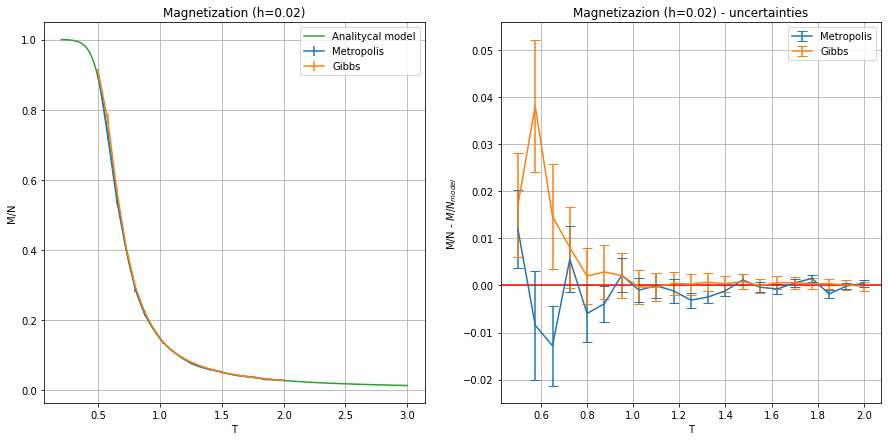

In [6]:
mmodel=m(Tmodel, 0.02)

Tmetro, mmetro, err_mmetro=np.loadtxt( "data/magMetro.dat", usecols=(0,1,2), delimiter=' ', unpack='true' )
Tgibbs, mgibbs, err_mgibbs=np.loadtxt( "data/magGibbs.dat", usecols=(0,1,2), delimiter=' ', unpack='true' )

fig= plt.figure(figsize=(15,7))

plt.subplot(121)
plt.errorbar(Tmetro, mmetro, yerr=err_mmetro, label="Metropolis")
plt.errorbar(Tgibbs, mgibbs, yerr=err_mgibbs, label="Gibbs")
plt.plot(Tmodel, mmodel, label="Analitycal model")
plt.title("Magnetization (h=0.02)")
plt.xlabel("T")
plt.ylabel("M/N")
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.errorbar(Tmetro, mmetro-m(Tmetro,0.02),yerr=err_mmetro, label="Metropolis", capsize=5)
plt.errorbar(Tgibbs, mgibbs-m(Tgibbs,0.02),yerr=err_mgibbs, label="Gibbs", capsize=5)
plt.axhline(0, 0,1, color="red")
plt.title("Magnetizazion (h=0.02) - uncertainties")
plt.xlabel("T")
plt.ylabel("M/N - $M/N_{model}$")
plt.grid(True)
plt.legend()
    
plt.show()

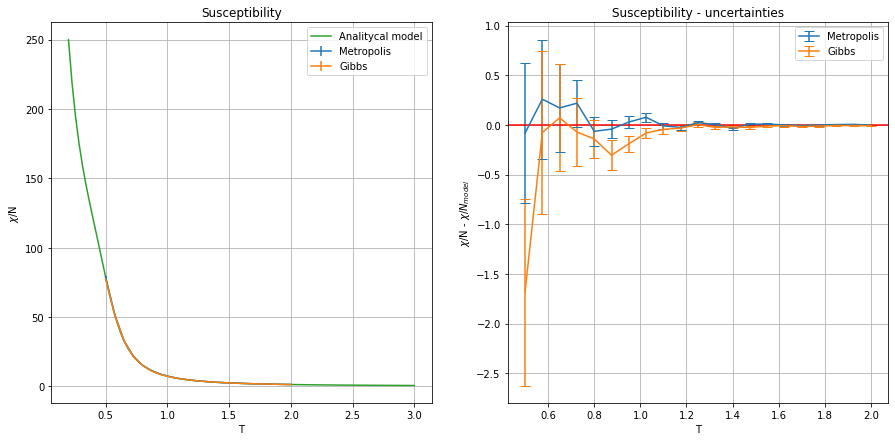

In [7]:
chimodel=chi(Tmodel)

Tmetro, chimetro, err_chimetro=np.loadtxt( "data/chiMetro.dat", usecols=(0,1,2), delimiter=' ', unpack='true' )
Tgibbs, chigibbs, err_chigibbs=np.loadtxt( "data/chiGibbs.dat", usecols=(0,1,2), delimiter=' ', unpack='true' )

fig= plt.figure(figsize=(15,7))

plt.subplot(121)
plt.errorbar(Tmetro, chimetro, yerr=err_chimetro, label="Metropolis")
plt.errorbar(Tgibbs, chigibbs, yerr=err_chigibbs, label="Gibbs")
plt.plot(Tmodel, chimodel, label="Analitycal model")
plt.title("Susceptibility")
plt.xlabel("T")
plt.ylabel("$\chi$/N")
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.errorbar(Tmetro, chimetro-chi(Tmetro),yerr=err_chimetro, label="Metropolis", capsize=5)
plt.errorbar(Tgibbs, chigibbs-chi(Tgibbs),yerr=err_chigibbs, label="Gibbs", capsize=5)
plt.axhline(0, 0,1, color="red")
plt.title("Susceptibility - uncertainties")
plt.xlabel("T")
plt.ylabel("$\chi$/N - $\chi/N_{model}$")
plt.grid(True)
plt.legend()
    
plt.show()

We can clearly see a good accordance between both models and the analitycal results for all four quantities. It is also evident that the lower the temperature gets, the more the algorithms struggle to get the right result and the greater the uncertainty on that value becomes. In particular the Gibbs algorithm seems to suffer more than the Metropolis one. This could be caused by the fact that there are less possible permutations of the spins at lower temperatures (since they are required to be almost all aligned) and so it is harder for the algorithm to find a valid move. This can be visualized plotting the acceptance rate of the Metropolis algorithm as a function of the temperature, as done below.

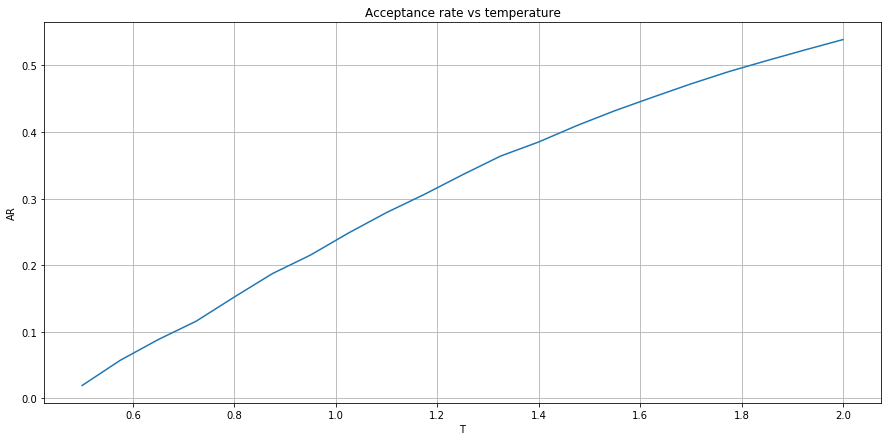

In [8]:
x, y = np.loadtxt( "data/AR.dat", usecols=(0,1), delimiter=' ', unpack='true' )

fig=plt.figure(figsize=(15,7))
plt.plot(x,y)
plt.title('Acceptance rate vs temperature')
plt.xlabel('T')
plt.ylabel('AR')
plt.grid(True)
plt.show()